# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
city_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_ride_count.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
city_drivers_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
city_drivers_count.head

<bound method NDFrame.head of type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64>

In [6]:
#  3. Get the total amount of fares for each city type
city_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
city_fare_count.head()



type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
city_average_fare = pyber_data_df.groupby(["type"]).mean()["fare"]
city_average_fare.head()



type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
average_driver_fare = pyber_data_df.groupby(["type"]).mean()["driver_count"]
average_driver_fare

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({"Total rides": city_ride_count,
                                "Total drivers": city_drivers_count,
                                "Total fares": city_fare_count,
                                "Avg fare per ride": city_average_fare,
                                "Avg fare per driver": average_driver_fare,
                                })
pyber_summary_df


,Total rides,Total drivers,Total fares,Avg fare per ride,Avg fare per driver
type,,,,,
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total rides,Total drivers,Total fares,Avg fare per ride,Avg fare per driver
Rural,125,537,4327.93,34.623440,4.296000
Suburban,625,8570,19356.33,30.970128,13.712000
Urban,1625,59602,39854.38,24.525772,36.678154


In [11]:
#  8. Format the columns.
pyber_summary_df["Total fares"] = pyber_summary_df["Total fares"].map("${:,.2f}".format)
pyber_summary_df["Avg fare per ride"] = pyber_summary_df["Avg fare per ride"].map("{:.2f}".format)
pyber_summary_df["Avg fare per driver"] = pyber_summary_df["Avg fare per driver"].map("{:.2f}".format)


pyber_summary_df



,Total rides,Total drivers,Total fares,Avg fare per ride,Avg fare per driver
Rural,125,537,"$4,327.93",34.62,4.30
Suburban,625,8570,"$19,356.33",30.97,13.71
Urban,1625,59602,"$39,854.38",24.53,36.68


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_dates_df = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
sum_fares_dates_df


date            type    
1/1/2019 0:08   Urban       37.91
1/1/2019 0:46   Suburban    47.74
1/1/2019 12:32  Suburban    25.56
1/1/2019 14:40  Urban        5.42
1/1/2019 14:42  Urban       12.31
                            ...  
5/8/2019 1:54   Urban       32.69
5/8/2019 2:31   Urban       41.33
5/8/2019 4:20   Urban       21.99
5/8/2019 4:39   Urban       18.45
5/8/2019 7:29   Urban       18.55
Name: fare, Length: 2364, dtype: float64

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df = sum_fares_dates_df.reset_index()
df


,date,type,fare
0,1/1/2019 0:08,Urban,37.91
1,1/1/2019 0:46,Suburban,47.74
2,1/1/2019 12:32,Suburban,25.56
3,1/1/2019 14:40,Urban,5.42
4,1/1/2019 14:42,Urban,12.31
...,...,...,...
2359,5/8/2019 1:54,Urban,32.69
2360,5/8/2019 2:31,Urban,41.33
2361,5/8/2019 4:20,Urban,21.99
2362,5/8/2019 4:39,Urban,18.45


In [21]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df_pivot_table = pd.pivot_table(df, values= 'fare', index = 'date', columns ='type')
df_pivot_table



type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [22]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

df_pyber_pivot_table = df_pivot_table.loc["2019-01-01":"2019-04-29"]
df_pyber_pivot_table


type,Rural,Suburban,Urban
date,,,


In [23]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
df_pivot_table.index = pd.to_datetime(df_pivot_table.index)


In [24]:
# 7. Check that the datatype for the index is datetime using df.info()
df_pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [25]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df_pivot_table  = df_pivot_table.resample("W").sum()
df_pivot_table

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0.5, 1.0, 'Total fare by City Type')

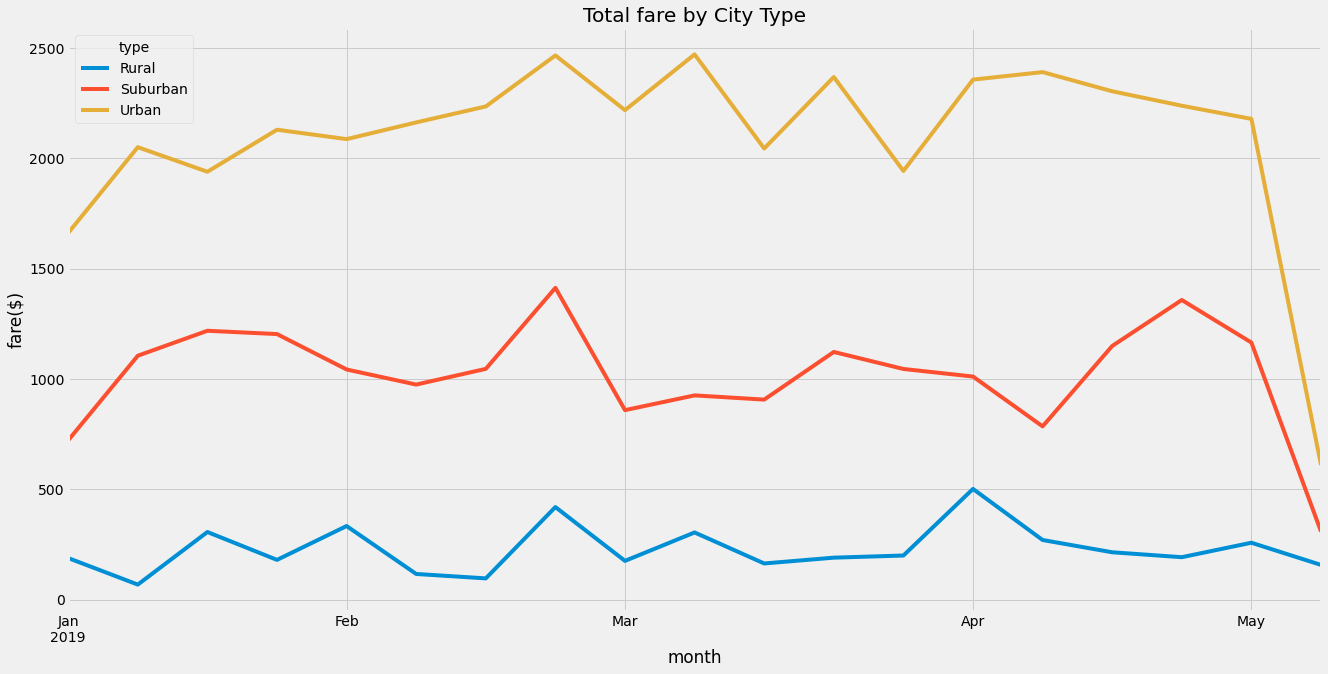

In [26]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# import the style from matplotlib
from matplotlib import style
# use the graph style ficethirtyeight
style.use("fivethirtyeight")

# create the plot
# fig = plt.figure()
#ax = plt.axes()
#ax = plt.axes()
#ax.plt(x_axis = df_pivottable_res.index, y_axis = df_pivottable_res.Rural, 
#marker = "D", color = "g", linewidth = 2, label ="Boston")


df_pivot_table.plot(figsize = (20,10))
plt.ylabel("fare($)")
plt.xlabel("month")
plt.title("Total fare by City Type")


# save figure
# plt.savefig("analysis/fig.png")
# plt.legend()


